In [2]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
import math
import numpy as np
sys.path.append('../../pytools')
import d2l
import os

d2l.gpu_mem_init()

2026-01-31 12:55:53.911713: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-31 12:55:53.973311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-31 12:55:55.443641: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [14]:
#@save
d2l.DATA_HUB['fra-eng'] = (d2l.DATA_URL + 'fra-eng.zip',
                           '94646ad1522d915e7b0f9296181140edcf86a4f5')

#@save
def read_data_nmt():
    """载入“英语－法语”数据集"""
    data_dir = d2l.download_extract('fra-eng')
    with open(os.path.join(data_dir, 'fra.txt'), 'r',
             encoding='utf-8') as f:
        return f.read()

raw_text = read_data_nmt()
print(raw_text[:75])

Go.	Va !
Hi.	Salut !
Run!	Cours !
Run!	Courez !
Who?	Qui ?
Wow!	Ça alors !



In [4]:
text = d2l.preprocess_nmt(raw_text)
print(text[:80])

go .	va !
hi .	salut !
run !	cours !
run !	courez !
who ?	qui ?
wow !	ça alors !


In [20]:
source, target = d2l.tokenize_nmt(text)
source[19:20], target[19:20]

([['i', 'see', '.']], [['je', 'comprends', '.']])

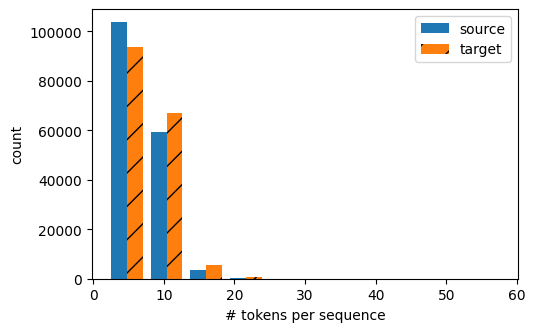

In [22]:
d2l.show_list_len_pair_hist(['source', 'target'], '# tokens per sequence',
                        'count', source, target);

In [31]:
src_vocab = d2l.Vocab(source, min_freq=2,
                      reserved_tokens=['<pad>', '<bos>', '<eos>'])
src_vocab.to_tokens(100)
    

'now'

In [35]:
d2l.truncate_pad(src_vocab[source[0]], 10, src_vocab['<pad>'])

[47, 4, 1, 1, 1, 1, 1, 1, 1, 1]

In [38]:
train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size=2, num_steps=8)
for X, X_valid_len, Y, Y_valid_len in train_iter:
    print('X:', tf.cast(X, tf.int32))
    print('X的有效长度:', X_valid_len)
    print('Y:', tf.cast(Y, tf.int32))
    print('Y的有效长度:', Y_valid_len)
    break

X: tf.Tensor(
[[ 54   5   3   1   1   1   1   1]
 [113   4   3   1   1   1   1   1]], shape=(2, 8), dtype=int32)
X的有效长度: tf.Tensor([3 3], shape=(2,), dtype=int32)
Y: tf.Tensor(
[[93  5  3  1  1  1  1  1]
 [65  5  3  1  1  1  1  1]], shape=(2, 8), dtype=int32)
Y的有效长度: tf.Tensor([3 3], shape=(2,), dtype=int32)
